<a href="https://colab.research.google.com/github/ManuelVR461/redesneuronales/blob/master/redesneuronales1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
#CREAR el Dataset

#numero de registros {500 personas}
n = 500

#cuantas caracteristicas hay en este dato. {altura y edad}
p = 2

X,Y = make_circles(n_samples=n, factor=0.5,noise=0.05)

Y = Y[:,np.newaxis];

print(Y.shape)

(500, 1)


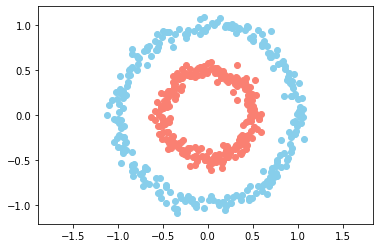

In [3]:
plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")
plt.axis("equal")
plt.show()

In [0]:
#clase de la capa de la red
class capa_neural():

  def __init__(self,n_conexiones,n_neuronas,funcion_activacion):

    self.funcion_activacion = funcion_activacion;

    self.b = np.random.rand(1,n_neuronas) * 2 - 1;
    self.w = np.random.rand(n_conexiones,n_neuronas) * 2 - 1;


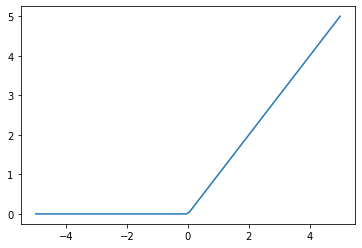

In [5]:
#funciones de activacion

#0 funcion sigmoide
#1 derivada de la funcion
sigm = (lambda x: 1/(1 + np.e ** (-x)),
        lambda x: x * (1 - x));

#function relu
relu = lambda x: np.maximum(0,x);


_x = np.linspace(-5,5,100);
plt.plot(_x,relu(_x));

In [0]:
##l0 = capa_neural(p,4,sign);
##l1 = capa_neural(4,8,sign);
#...

def crear_red_reural(topologia,funcion_activacion):

  nn = [];

  for i, layer in enumerate(topologia[:-1]):

    nn.append(capa_neural(topologia[i],topologia[i+1],funcion_activacion));
    
  return nn;


In [7]:
# FUNCION DE ENTRENAMIENTO

topologia = [p,4,8,1];

neural_net = crear_red_reural(topologia,sigm);

print(neural_net)

[<__main__.capa_neural object at 0x7f7675ac0a58>, <__main__.capa_neural object at 0x7f7675ac0198>, <__main__.capa_neural object at 0x7f7675ac0fd0>]


In [0]:
funcion_coste = (lambda Yp,Yr: np.mean((Yp -Yr) ** 2),
                 lambda Yp, Yr: (Yp - Yr));

In [10]:
def entrenamiento(neural_net,X,Y,funcion_coste,lr = 0.5,entrenar=True):  

  #forward pass
  out = [(None,X)];
  for i, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[i].w + neural_net[i].b;
    a = neural_net[i].funcion_activacion[0](z);

    out.append((z,a));

  #print(funcion_coste[0](out[-1][1],Y))

  if entrenar:

    #backward pass
    deltas = [];

    for i in reversed(range(0, len(neural_net) )):

      z = out[i+1][0];
      a = out[i+1][1];

      #print(a.shape)

      if i == len(neural_net) - 1:
        #calcular delta ultima capa
        deltas.insert(0, funcion_coste[1](a,Y) * neural_net[i].funcion_activacion[1](a))
      else:
        deltas.insert(0, deltas[0] @ _w.T * neural_net[i].funcion_activacion[1](a));
        
      #print(deltas)
      _w = neural_net[i].w

      #gradiente descent
      neural_net[i].b = neural_net[i].b - np.mean(deltas[0],axis=0,keepdims=True) * lr;
      #print(deltas[0].shape);
      neural_net[i].w = neural_net[i].w - out[i][1].T @ deltas[0] * lr;
      

  return out[-1][1];
print("")
#entrenamiento(neural_net, X, Y, funcion_coste, 0.5);


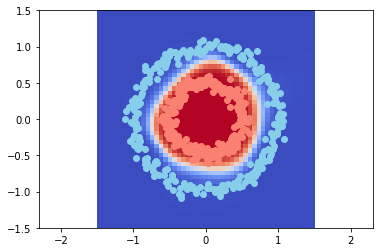

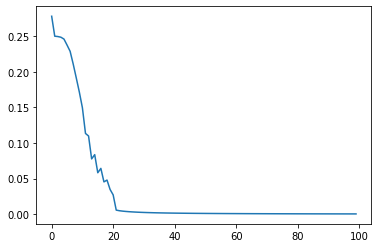

In [11]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_net = crear_red_reural(topologia, sigm)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = entrenamiento(neural_net, X, Y, funcion_coste, lr=0.05)
  
  if i % 25 == 0:
    
    #print(pY)
  
    loss.append(funcion_coste[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = entrenamiento(neural_net, np.array([[x0, x1]]), Y, funcion_coste, entrenar=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5) 